In [1]:
from keras.callbacks import History
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.datasets import cifar10
from keras.engine import training
from keras.losses import categorical_crossentropy
from keras.models import Model
from keras import Input
from keras.optimizers import Adam
from keras.utils import to_categorical
from tensorflow.python.framework.ops import Tensor
from typing import Tuple, List
import glob
import numpy as np
import os
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Average
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.applications.vgg19 import VGG19, preprocess_input
from keras.applications.resnet import ResNet50
from keras.applications.nasnet import NASNetLarge
from keras.applications.efficientnet_v2 import EfficientNetV2L
from keras.applications.densenet import DenseNet201
from keras.applications.xception import Xception, preprocess_input
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten
from pathlib import Path
import numpy as np

import inspect
from tqdm import tqdm
import matplotlib.pyplot as plt
from numpy import save


from livelossplot.inputs.keras import PlotLossesCallback
from sklearn.metrics import accuracy_score
from scipy import stats
from statistics import mean
from keras.models import load_model
from sklearn.metrics import accuracy_score

In [2]:

BATCH_SIZE = 64

train_generator = ImageDataGenerator(rescale=1./255) 

val_generator = ImageDataGenerator(rescale=1./255)

test_generator = ImageDataGenerator(rescale=1./255)


In [14]:
train_data_dir = './data_splits/train'
val_data_dir = './data_splits/val'
test_data_dir = './data_splits/test'




traingen = train_generator.flow_from_directory(train_data_dir,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               batch_size=BATCH_SIZE,
                                               subset='training',
                                               seed=30)

validgen = val_generator.flow_from_directory(val_data_dir,
                                             target_size=(224, 224),
                                             batch_size=BATCH_SIZE,
                                               class_mode='categorical',
                                               seed=52)

testgen = test_generator.flow_from_directory(test_data_dir,
                                             target_size=(224, 224),
                                             batch_size=BATCH_SIZE,
                                             class_mode='categorical',
                                             shuffle=False,
                                             seed=52)

Found 151 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Found 51 images belonging to 2 classes.


In [4]:
input_shape = (224, 224, 3)
optimizer = Adam(learning_rate=0.001)
n_classes= len(traingen.class_indices)

n_steps = traingen.samples // BATCH_SIZE
n_val_steps = validgen.samples // BATCH_SIZE
n_epochs = 100
model_input = Input(shape=input_shape)

# Shallow

Defining models with shallow FC layers

In [6]:
def vgg16_shallow(model_input: Tensor, optimizer) -> training.Model:
    conv_base = VGG16(include_top = False,
                weights = 'imagenet',
                input_shape = input_shape)
    
    for layer in conv_base.layers:
        layer.trainable = False
        
    top_model = Flatten()(conv_base.output)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(1000, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)

    model = Model(inputs = conv_base.input, outputs= output_layer, name='vgg16_model')
    model.compile(optimizer=optimizer, 
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model

def vgg19_shallow(model_input: Tensor, optimizer) -> training.Model:
    conv_base = VGG19(include_top = False,
                weights = 'imagenet',
                input_shape = input_shape)
    
    for layer in conv_base.layers:
        layer.trainable = False
        
    top_model = Flatten()(conv_base.output)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(1000, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)

    model = Model(inputs = conv_base.input, outputs= output_layer, name='vgg19_model')
    model.compile(optimizer=optimizer, 
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model




def mobilenet_shallow(model_input: Tensor, optimizer) -> training.Model:
    conv_base = MobileNetV2(include_top = False,
                weights = 'imagenet',
                input_shape = input_shape)
    
    for layer in conv_base.layers:
        layer.trainable = False
        
    top_model = Flatten()(conv_base.output)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(1000, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)

    model = Model(inputs = conv_base.input, outputs= output_layer, name='mobilenet_model')
    model.compile(optimizer=optimizer, 
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model







def xception_shallow(model_input: Tensor, optimizer) -> training.Model:
    conv_base = Xception(include_top = False,
                weights = 'imagenet',
                input_shape = input_shape)
    
    for layer in conv_base.layers:
        layer.trainable = False
        
    top_model = Flatten()(conv_base.output)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(1000, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)

    model = Model(inputs = conv_base.input, outputs= output_layer, name='xception_model')
    model.compile(optimizer=optimizer, 
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model

def resnet50_shallow(model_input: Tensor, optimizer) -> training.Model:
    conv_base = ResNet50(include_top = False,
                weights = 'imagenet',
                input_shape = input_shape)
   
    for layer in conv_base.layers:
        layer.trainable = False
       
    top_model = Flatten()(conv_base.output)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(1000, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)
   
    model = Model(inputs = conv_base.input, outputs= output_layer, name='resnet50_model')
    model.compile(optimizer=optimizer,
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model

def nasnetlarge_shallow(model_input: Tensor, optimizer) -> training.Model:
    conv_base = NASNetLarge(include_top = False,
                weights = 'imagenet',
                input_shape = input_shape)
   
    for layer in conv_base.layers:
        layer.trainable = False
       
    top_model = Flatten()(conv_base.output)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(1000, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)
   
    model = Model(inputs = conv_base.input, outputs= output_layer, name='nasnetlarge_model')
    model.compile(optimizer=optimizer,
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model

def efficientnet_shallow(model_input: Tensor, optimizer) -> training.Model:
    conv_base = EfficientNetV2L(include_top = False,
                weights = 'imagenet',
                input_shape = input_shape)
   
    for layer in conv_base.layers:
        layer.trainable = False
       
    top_model = Flatten()(conv_base.output)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(1000, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)
   
    model = Model(inputs = conv_base.input, outputs= output_layer, name='efficientnet_model')
    model.compile(optimizer=optimizer,
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
   
   
    return model



# Medium

Defining models with medium FC layers

In [7]:

def mobilenet_medium(model_input: Tensor, optimizer) -> training.Model:
    conv_base = MobileNetV2(include_top = False,
                weights = 'imagenet',
                input_shape = input_shape)
    
    for layer in conv_base.layers:
        layer.trainable = False
        
    top_model = Flatten()(conv_base.output)
    top_model = Dense(1024, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(256, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)

    model = Model(inputs = conv_base.input, outputs= output_layer, name='mobilenet_model')
    model.compile(optimizer=optimizer, 
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model

def xception_medium(model_input: Tensor, optimizer) -> training.Model:
    conv_base = Xception(include_top = False,
                weights = 'imagenet',
                input_shape = input_shape)
    
    for layer in conv_base.layers:
        layer.trainable = False
        
    top_model = Flatten()(conv_base.output)
    top_model = Dense(1024, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(256, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)

    model = Model(inputs = conv_base.input, outputs= output_layer, name='xception_model')
    model.compile(optimizer=optimizer, 
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model

def vgg19_medium(model_input: Tensor, optimizer) -> training.Model:
    conv_base = VGG19(include_top = False,
                weights = 'imagenet',
                input_shape = input_shape)
    
    for layer in conv_base.layers:
        layer.trainable = False
        
    top_model = Flatten()(conv_base.output)
    top_model = Dense(1024, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(256, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)

    model = Model(inputs = conv_base.input, outputs= output_layer, name='vgg19_model')
    model.compile(optimizer=optimizer, 
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model

def vgg16_medium(model_input: Tensor, optimizer) -> training.Model:
    conv_base = VGG16(include_top = False,
                weights = 'imagenet',
                input_shape = input_shape)
    
    for layer in conv_base.layers:
        layer.trainable = False
        
    top_model = Flatten()(conv_base.output)
    top_model = Dense(1024, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(256, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)

    model = Model(inputs = conv_base.input, outputs= output_layer, name='vgg16_model')
    model.compile(optimizer=optimizer, 
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model





def resnet50_medium(model_input: Tensor, optimizer) -> training.Model:
    conv_base = ResNet50(include_top = False,
                weights = 'imagenet',
                input_shape = input_shape)
   
    for layer in conv_base.layers:
        layer.trainable = False
       
    top_model = Flatten()(conv_base.output)
    top_model = Dense(1024, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(256, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)
   
    model = Model(inputs = conv_base.input, outputs= output_layer, name='resnet50_model')
    model.compile(optimizer=optimizer,
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model

def nasnetlarge_medium(model_input: Tensor, optimizer) -> training.Model:
    conv_base = NASNetLarge(include_top = False,
                weights = 'imagenet',
                input_shape = input_shape)
   
    for layer in conv_base.layers:
        layer.trainable = False
       
    top_model = Flatten()(conv_base.output)
    top_model = Dense(1024, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(256, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)
   
    model = Model(inputs = conv_base.input, outputs= output_layer, name='nasnetlarge_model')
    model.compile(optimizer=optimizer,
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model

def efficientnet_medium(model_input: Tensor, optimizer) -> training.Model:
    conv_base = EfficientNetV2L(include_top = False,
                weights = 'imagenet',
                input_shape = input_shape)
   
    for layer in conv_base.layers:
        layer.trainable = False
       
    top_model = Flatten()(conv_base.output)
    top_model = Dense(1024, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(256, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)
   
    model = Model(inputs = conv_base.input, outputs= output_layer, name='efficientnet_model')
    model.compile(optimizer=optimizer,
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model



# DNN

Defining models with DNN Fully connected layers

In [8]:
def xception_dnn(model_input: Tensor, optimizer) -> training.Model:
    conv_base = Xception(include_top = False,
                weights = 'imagenet',
                input_shape = input_shape)
    
    for layer in conv_base.layers:
        layer.trainable = False
        
    top_model = Flatten()(conv_base.output)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(1000, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(256, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)

    model = Model(inputs = conv_base.input, outputs= output_layer, name='xception_model')
    model.compile(optimizer=optimizer, 
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model

def vgg19_dnn(model_input: Tensor, optimizer) -> training.Model:
    conv_base = VGG19(include_top = False,
                weights = 'imagenet',
                input_shape = input_shape)
    
    for layer in conv_base.layers:
        layer.trainable = False
        
    top_model = Flatten()(conv_base.output)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(1000, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(256, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)

    model = Model(inputs = conv_base.input, outputs= output_layer, name='vgg19_model')
    model.compile(optimizer=optimizer, 
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model

def vgg16_dnn(model_input: Tensor, optimizer) -> training.Model:
    conv_base = VGG16(include_top = False,
                weights = 'imagenet',
                input_shape = input_shape)
    
    for layer in conv_base.layers:
        layer.trainable = False
        
    top_model = Flatten()(conv_base.output)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(1000, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(256, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)

    model = Model(inputs = conv_base.input, outputs= output_layer, name='vgg16_model')
    model.compile(optimizer=optimizer, 
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model



def mobilenet_dnn(model_input: Tensor, optimizer) -> training.Model:
    conv_base = MobileNetV2(include_top = False,
                weights = 'imagenet',
                input_shape = input_shape)
    
    for layer in conv_base.layers:
        layer.trainable = False
        
    top_model = Flatten()(conv_base.output)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(1000, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(256, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)

    model = Model(inputs = conv_base.input, outputs= output_layer, name='mobilenet_model')
    model.compile(optimizer=optimizer, 
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model





def nasnetlarge_dnn(model_input: Tensor, optimizer) -> training.Model:
    conv_base = NASNetLarge(include_top = False,
                weights = 'imagenet',
                input_shape = input_shape)
   
    for layer in conv_base.layers:
        layer.trainable = False
       
    top_model = Flatten()(conv_base.output)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(1000, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(256, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)
   
    model = Model(inputs = conv_base.input, outputs= output_layer, name='nasnetlarge_model')
    model.compile(optimizer=optimizer,
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model

def resnet50_dnn(model_input: Tensor, optimizer) -> training.Model:
    conv_base = ResNet50(include_top = False,
                weights = 'imagenet',
                input_shape = input_shape)
   
    for layer in conv_base.layers:
        layer.trainable = False
       
    top_model = Flatten()(conv_base.output)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(1000, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(256, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)
   
    model = Model(inputs = conv_base.input, outputs= output_layer, name='resnet50_model')
    model.compile(optimizer=optimizer,
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model

def efficientnet_dnn(model_input: Tensor, optimizer) -> training.Model:
    conv_base = EfficientNetV2L(include_top = False,
                weights = 'imagenet',
                input_shape = input_shape)
   
    for layer in conv_base.layers:
        layer.trainable = False
       
    top_model = Flatten()(conv_base.output)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(1000, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(256, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)
   
    model = Model(inputs = conv_base.input, outputs= output_layer, name='efficientnet_model')
    model.compile(optimizer=optimizer,
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model






loading weights of trained models

In [ ]:
vgg16_model_shallow = vgg16_shallow(model_input, optimizer)
vgg16_model_shallow.load_weights('tl_model_nonprocessed_vgg16_shallow.weights.best.hdf5')

vgg19_model_shallow = vgg19_shallow(model_input, optimizer)
vgg19_model_shallow.load_weights('tl_model_nonprocessed_vgg19_shallow.weights.best.hdf5')


mobilenet_model_shallow = mobilenet_shallow(model_input, optimizer)
mobilenet_model_shallow.load_weights('tl_model_nonprocessed_mobilenet_shallow.weights.best.hdf5')

xception_model_shallow = xception_shallow(model_input, optimizer)
xception_model_shallow.load_weights('tl_model_nonprocessed_xception_shallow.weights.best.hdf5')

efficientnet_model_shallow = efficientnet_shallow(model_input, optimizer)
efficientnet_model_shallow.load_weights('tl_model_nonprocessed_efficientnet_shallow.weights.best.hdf5')

resnet_model_shallow = resnet50_shallow(model_input, optimizer)
resnet_model_shallow.load_weights('tl_model_nonprocessed_resnet50_shallow.weights.best.hdf5')



nasnetlarge_model_shallow = nasnetlarge_shallow(model_input, optimizer)
nasnetlarge_model_shallow.load_weights('tl_model_nonprocessed_nasnetlarge_shallow.weights.best.hdf5')


####################################### medium ############################################

vgg16_model_medium = vgg16_medium(model_input, optimizer)
vgg16_model_medium.load_weights('tl_model_nonprocessed_vgg16_medium.weights.best.hdf5')

vgg19_model_medium = vgg19_medium(model_input, optimizer)
vgg19_model_medium.load_weights('tl_model_nonprocessed_vgg19_medium.weights.best.hdf5')



mobilenet_model_medium = mobilenet_medium(model_input, optimizer)
mobilenet_model_medium.load_weights('tl_model_nonprocessed_mobilenet_medium.weights.best.hdf5')

xception_model_medium = xception_medium(model_input, optimizer)
xception_model_medium.load_weights('tl_model_nonprocessed_xception_medium.weights.best.hdf5')

efficientnet_model_medium = efficientnet_medium(model_input, optimizer)
efficientnet_model_medium.load_weights('tl_model_nonprocessed_efficientnet_medium.weights.best.hdf5')

resnet_model_medium = resnet50_medium(model_input, optimizer)
resnet_model_medium.load_weights('tl_model_nonprocessed_resnet50_medium.weights.best.hdf5')



nasnetlarge_model_medium = nasnetlarge_medium(model_input, optimizer)
nasnetlarge_model_medium.load_weights('tl_model_nonprocessed_nasnetlarge_medium.weights.best.hdf5')



################################## dnn ############################
vgg16_model_dnn = vgg16_dnn(model_input, optimizer)
vgg16_model_dnn.load_weights('tl_model_nonprocessed_vgg16_dnn.weights.best.hdf5')

vgg19_model_dnn = vgg19_dnn(model_input, optimizer)
vgg19_model_dnn.load_weights('tl_model_nonprocessed_vgg19_dnn.weights.best.hdf5')


mobilenet_model_dnn = mobilenet_dnn(model_input, optimizer)
mobilenet_model_dnn.load_weights('tl_model_nonprocessed_mobilenet_dnn.weights.best.hdf5')


xception_model_dnn = xception_dnn(model_input, optimizer)
xception_model_dnn.load_weights('tl_model_nonprocessed_xception_dnn.weights.best.hdf5')

efficientnet_model_dnn = efficientnet_dnn(model_input, optimizer)
efficientnet_model_dnn.load_weights('tl_model_nonprocessed_efficientnet_dnn.weights.best.hdf5')

resnet_model_dnn = resnet50_dnn(model_input, optimizer)
resnet_model_dnn.load_weights('tl_model_nonprocessed_resnet50_dnn.weights.best.hdf5')



nasnetlarge_model_dnn = nasnetlarge_dnn(model_input, optimizer)
nasnetlarge_model_dnn.load_weights('tl_model_nonprocessed_nasnetlarge_dnn.weights.best.hdf5')




In [9]:
class GeneticAlgorithm:
    def __init__(self, 
                 n_genes,
                 n_iterations,
                 lchrom, 
                 pcross, 
                 pmutation, 
                 crossover_type, 
                 mutation_type, 
                 selection_type, 
                 cut_point,
                 popsize, 
                 n_elites,
                 models,
                 n_classes,
                 traingen,
                 validgen,
                 n_steps,
                 n_val_steps,
                 n_epochs,
                 random_state = 123):
        

        self.n_genes = n_genes
        self.lchrom = lchrom
        self.popsize = popsize
        self.pcross = pcross
        self.pmutation = pmutation
        self.crossover_type = crossover_type
        self.mutation_type = mutation_type
        self.selection_type = selection_type
        self.random_state = random_state
        self.n_iterations = n_iterations
        self.n_elites = n_elites
        self.best_fitness_evolution = []
        self.cut_point = cut_point
        self.models = models
        self.n_classes = n_classes
        self.traingen = traingen
        self.validgen = validgen
        self.batch_size = 32
        self.input_shape = (32, 32, 3)
        self.n_steps = n_steps
        self.n_val_steps = n_val_steps
        self.n_epochs = n_epochs
    
        pop = []
        while (len(pop) < self.popsize):
            chromosome = np.random.randint(2, size= self.n_genes)
            if (sum(chromosome[:self.cut_point]) > 0 and sum(chromosome[self.cut_point:]) == 1 ):
                pop.append(chromosome)

            
        # Convert pop to list of solutions
        self.population = [tuple(x) for x in pop]

        
        
    # the fitness function for the GA
    def fitness_func(self, solution, cut_point):
        
        models = []
        
        input_shape = (224, 224, 3)
        model_input = Input(shape=input_shape)
        
        # first, define the three meta learners
        
        for i in range(cut_point, len(solution)):
            if (solution[i]):
           
                if i == 7:
                    # 1. shallow fully connected layers
                    for j in range(cut_point):
                        if (solution[j]):
                            if j == 0:
                                models.append(vgg16_model_shallow)
                           
                           
                            if j == 1:
                                models.append(vgg19_model_shallow)
                           
                           
                            if j == 2:
                                models.append(xception_model_shallow)
                           
                            if j == 3:
                                models.append(mobilenet_model_shallow)

                            if j == 4:
                                models.append(resnet_model_shallow)

                            if j == 5:
                                models.append(efficientnet_model_shallow)
                            if j == 6:
                                models.append(nasnetlarge_model_shallow)

                            
                           
               
                if i == 8:
                   
                    # 2. medium size fully connected layers
                    for j in range(cut_point):
                        if (solution[j]):
                            if j == 0:
                                models.append(vgg16_model_medium)
                               
                               
                            if j == 1:
                                models.append(vgg19_model_medium)
                           
                               
                            if j == 2:
                                models.append(xception_model_medium)
                           
                            if j == 3:
                                models.append(mobilenet_model_medium)

                            if j == 4:
                                models.append(resnet_model_medium)

                            if j == 5:
                                models.append(efficientnet_model_medium)
                            if j == 6:
                                models.append(nasnetlarge_model_medium)

                            
                   
                   
                if i == 9:
                    # 3. DNN FC
                    for j in range(cut_point):

                        if (solution[j]):

                            if j == 0:
                                models.append(vgg16_model_dnn)
                                   
                                   
                            if j == 1:
                                models.append(vgg19_model_dnn)
                           
                           
                            if j == 2:
                                models.append(xception_model_dnn)

                            if j == 3:
                                models.append(mobilenet_model_dnn)

                            if j == 4:
                                models.append(resnet_model_dnn)

                            if j == 5:
                                models.append(efficientnet_model_dnn)
                            if j == 6:
                                models.append(nasnetlarge_model_dnn)

                            

        # defining the ensemble and evaluating the validation set
        model_input = Input(shape=(224, 224, 3))
        model_outputs = [model(model_input) for model in models]
        ensemble_output = Average()(model_outputs)
        ensemble_model = Model(inputs=model_input, outputs=ensemble_output, name='ensemble')

        
        optim_1 = Adam(learning_rate=0.001)

        
        
        ensemble_model.compile(optimizer=optim_1, 
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
        results = ensemble_model.evaluate(validgen)
        
        
        return results[1]


    def get_fitness_scores(self):
        scores = [self.fitness_func(sol, self.cut_point) for sol in self.population]
        return np.array(scores)

    def __append_best_score(self, scores):
        best_score = np.max(scores)
        self.best_fitness_evolution.append(best_score)
        return 'Ok'
    
    def __ranking_selection(self, scores):
        ind = np.argsort(scores)

        s = sum(ind)
        t = np.random.rand() * s
        partial_sum = 0
        i=0
        while(partial_sum <t and i <len(scores)):
            partial_sum += scores[i]

        selected = i
        return selected 
    
    def __roulette_selection(self, scores):
        s = sum(scores)
        t = np.random.rand() * s
        partial_sum = 0
        i=0
        while(partial_sum <t and i <len(scores)):
            partial_sum += scores[i]

        selected = i
        return selected

    def select(self, scores, selection_type):

        if selection_type not in ['ranking', 'roulette']:
            raise ValueError('Type should be ranking or tournament')

        if selection_type == 'ranking':
            ind = self.__ranking_selection(scores)
        elif selection_type == 'roulette':
            ind = self.__roulette_selection(scores)
        else:
            pass
        return ind

    def flip(self, p):
        return 1 if np.random.rand() < p else 0
    
    def format_func(self, value):
        return "%.3f" % value

    def __crossover(self, 
                    parent1, 
                    parent2, 
                    crossover_type,
                    pcross,
                    lchrom,
                    mutation_type,
                    pmutation):
        
        if crossover_type not in ['uniform', 'one_point', 'two_point']:
                raise ValueError('crossover_type should be one of uniform, one_point or multi_point')

            
        if self.flip(pcross):
            
            if crossover_type == 'one_point':
                index = np.random.choice(range(1, lchrom)) 

                parent1 = list(parent1)
                parent2 = list(parent2)

                child1 = self.__mutation(parent1[:index] + parent2[index:], mutation_type, pmutation)
                child2 = self.__mutation(parent2[:index] + parent1[index:] , mutation_type, pmutation)
                children = [child1, child2]
            elif crossover_type == 'two_point':
                point1 = np.random.choice(range(1, lchrom)) 
                point2 = np.random.choice(point1, range(lchrom))
                child1 = self.__mutation(parent1[:point1] + parent2[point1: point2] + parent1[point2:], mutation_type, pmutation)
                child2 = self.__mutation(parent2[:point1] + parent1[point1: point2] + parent2[point2:], mutation_type, pmutation)
                children = [child1, child2]
            else:
                t = np.random.rand()
                temp = np.random.rand(lchrom)
                child1 = self.__mutation([parent1[i] if temp[i] > t else parent2[i] for i in range(len(temp)) ], mutation_type, pmutation)
                child2 = self.__mutation([parent2[i] if temp[i] > t else parent1[i] for i in range(len(temp)) ], mutation_type, pmutation)
                children = [child1, child2]
               
        else:
            
            child1 = self.__mutation(parent1, self.mutation_type, pmutation)
            child2 = self.__mutation(parent2, self.mutation_type, pmutation)
            children = [child1, child2]
        
        return children
    


    def __mutation(self, individual, mutation_type, pmutation):

        if mutation_type not in ['bitstring', 'inversion', 'swap']:
            raise ValueError('mutation_type should be one of bitstring or inversion or swap')


        index = np.random.choice(len(individual))
        index2 = np.random.choice(len(individual))
        
        # Convert individual to list so that can be modified
        individual_mod = list(individual)
        if (self.flip(pmutation)):
            
            if mutation_type == 'bitstring':
                individual_mod[index] = 1 - individual_mod[index]
            elif mutation_type == 'inversion':
                individual_mod= individual_mod[0:index] + individual_mod[index2:index-1:-1] + individual_mod[index2+1:]
            else:
                individual_mod[index], individual_mod[index2] = individual_mod[index2], individual_mod[index]
        else:
            
            pass
        
        individual = tuple(individual_mod)

        return individual

    def optimize(self):

        for i in tqdm(range(self.n_iterations)):
            print("iteration number:" , i+1)

            # calculate fitness score
            scores = self.get_fitness_scores()
            #storing scores
            scores_array = [self.format_func(score) for score in scores]
            sfile = open("scores.txt", "a")
            sfile.write(str(scores_array))
            sfile.write("\n")
            sfile.close()
            
            # append best score
            _ = self.__append_best_score(scores)

            # get the result wher he results is the best
            best_score_ind = scores.tolist().index(max(scores))

            best_solution = self.population[best_score_ind]
            # storing best solution
            solutionfile = open("best_solution.txt", "a")
            content = str(best_solution)
            solutionfile.write(content)
            solutionfile.write("\n")
            solutionfile.close()
            print(best_solution)



            best_fitness = np.array(self.best_fitness_evolution)

            if (i>=5):
                if (best_fitness[i-1] == best_fitness[i-2]) and (best_fitness[i-2] == best_fitness[i-3]) \
                and (best_fitness[i-3] == best_fitness[i-4]) and (best_fitness[i-4] == best_fitness[i-5]):
                    self.pmutation =  self.pmutation + 0.05

            fitfile = open("fitness_evolution.txt", "a")
            fit = str(best_fitness)
            fitfile.write(fit)
            fitfile.write("\n")
            fitfile.close()
            print(best_fitness)
            
            # choose the elites of the current population
            ind = np.argsort(scores)
        
            elites = [self.population[i] for i in ind[-self.n_elites:]]

            #append the elites to the population
            new_population = [tuple(elite) for elite in elites]

            # make selection
            #new_population = []
            j = self.n_elites
            while j < self.popsize:
                
                # select parents from population
                mate1 = self.select(scores, self.selection_type)
                mate2 = self.select(scores, self.selection_type)

                mate1 = tuple(self.population[mate1])
                mate2 = tuple(self.population[mate2])

                #crossover + mutation
                children = self.__crossover(mate1, mate2, self.crossover_type, self.pcross, self.lchrom,self.mutation_type, self.pmutation)
                children = [tuple(child) for child in children]
                
                
                
                if ((sum(children[0][:self.cut_point]) != 0 and sum(children[0][self.cut_point:]) == 1) and
                    sum(children[1][:self.cut_point]) != 0 and sum(children[1][self.cut_point:]) == 1):
                    
                    new_population.append(tuple(children[0]))
                    new_population.append(tuple(children[1]))
                    j+=2
                
                

            self.population = new_population
            

        

        
        return (best_solution, self.best_fitness_evolution[-1])


    # run the genetic algorithm
    def view_fitness_evolution(self):
        plt.plot(
            range(len(self.best_fitness_evolution)),
            self.best_fitness_evolution)

In [10]:
models = ["vgg16", "VGG19",
          "ResNet50","DenseNet201"]
ga = GeneticAlgorithm(
    n_genes =10,
    n_iterations = 100,
    lchrom = 10, 
    cut_point = 7, 
    pcross = 0.8, 
    pmutation = 0.2, 
    crossover_type = 'one_point', 
    mutation_type = 'bitstring', 
    selection_type = 'ranking', 
    popsize = 7, 
    n_elites = 1,
    models = models,
    n_classes = n_classes,
    n_epochs=n_epochs,
    n_steps=n_steps,
    n_val_steps=n_val_steps,
    traingen=traingen,
    validgen=validgen,
    random_state = 123
)



In [11]:
ga.population

[(1, 0, 0, 1, 1, 0, 1, 0, 0, 1),
 (0, 1, 0, 0, 1, 0, 0, 1, 0, 0),
 (1, 1, 1, 0, 0, 1, 1, 0, 0, 1),
 (1, 1, 1, 1, 1, 0, 0, 1, 0, 0),
 (0, 1, 0, 1, 1, 0, 0, 1, 0, 0),
 (0, 0, 1, 1, 1, 0, 1, 1, 0, 0),
 (1, 0, 1, 1, 0, 0, 1, 1, 0, 0)]

In [ ]:
print(ga.optimize())
ga.view_fitness_evolution()

Predicting on unseen data using the ensemble

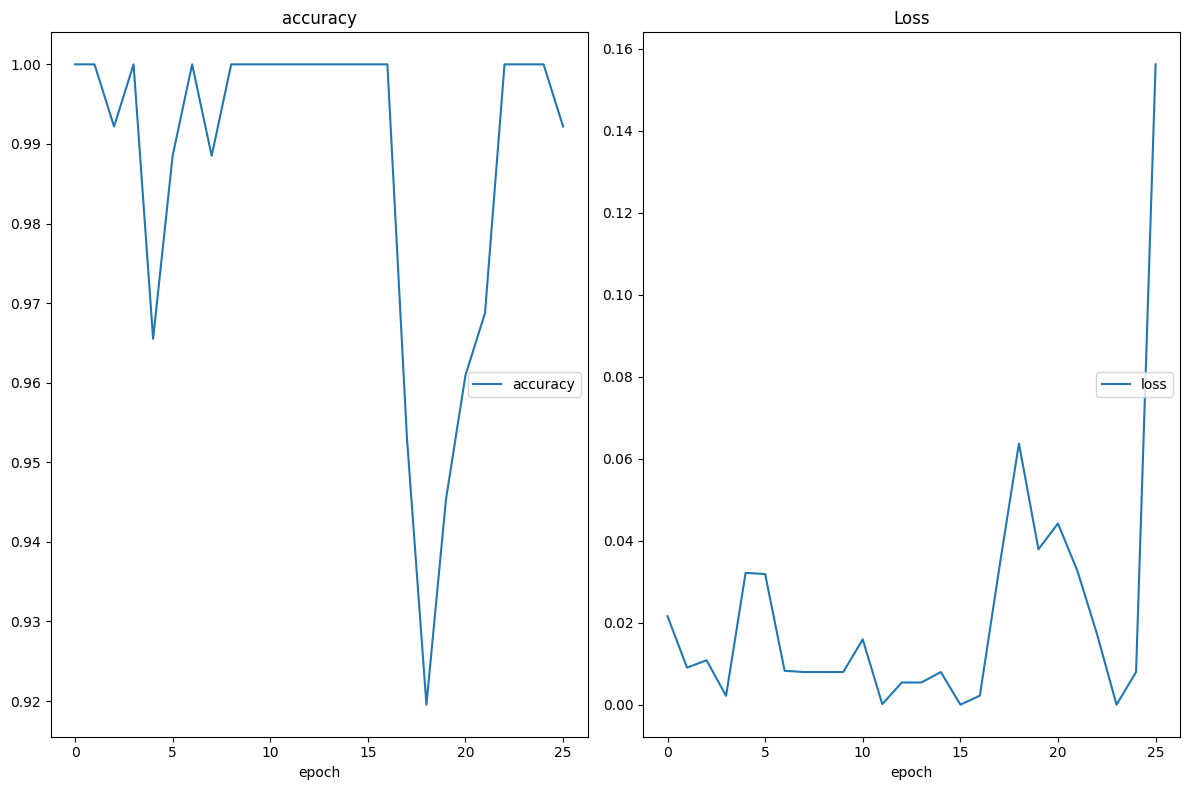

accuracy
	accuracy         	 (min:    0.920, max:    1.000, cur:    0.992)
Loss
	loss             	 (min:    0.000, max:    0.156, cur:    0.156)
2/2 [==============================] - 9s 5s/step - loss: 0.1562 - accuracy: 0.9922


In [10]:
models1 = [xception_model_dnn, mobilenet_model_dnn]
model_input = Input(shape=(224, 224, 3))
model_outputs = [model(model_input) for model in models1]
ensemble_output = Average()(model_outputs)
ensemble_model = Model(inputs=model_input, outputs=ensemble_output, name='ensemble')
plot_loss_densenet = PlotLossesCallback()

optim_1 = Adam(learning_rate=0.001)

tl_checkpoint_ensemble1 = ModelCheckpoint(filepath='tl_model_processed_ensemble1.weights.best.hdf5',
                                      monitor='loss',
                                save_best_only=True,
                                save_weights_only=True,
                                verbose=1)

# EarlyStopping
early_stop = EarlyStopping(monitor='loss',
                        patience=10,
                        restore_best_weights=True,
                        mode='min')

ensemble_model.compile(optimizer=optim_1, 
            loss='categorical_crossentropy',
            metrics=['accuracy'])

ensemble_model.fit(traingen,
        batch_size=BATCH_SIZE,
        epochs= n_epochs,
        shuffle= True,
        steps_per_epoch=n_steps,
        callbacks=[tl_checkpoint_ensemble1, early_stop, plot_loss_densenet],
        verbose=1)

In [15]:
y_prob = ensemble_model.predict(testgen)
y_pred = y_prob.argmax(axis=-1)

1/1 [==============================] - 2s 2s/step


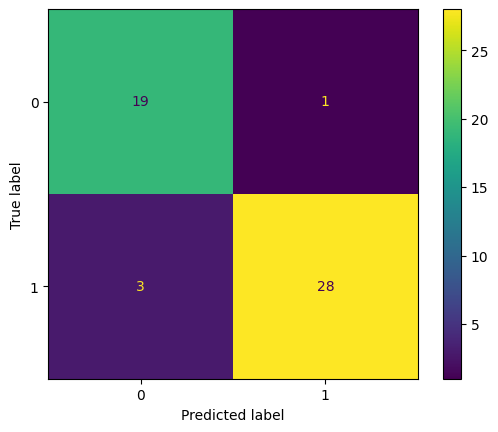

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(testgen.classes, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [19]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score, jaccard_score, roc_auc_score
y_test = testgen.classes
acc = accuracy_score(y_pred, y_test)
balanced_acc = balanced_accuracy_score(y_pred, y_test)
precision = precision_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)
auc = roc_auc_score(y_pred, y_test)
sensitivity = cm[0,0]/(cm[0,0] + cm[0,1])
specificity = cm[1,1] / (cm[1,0] + cm[1,1])

In [21]:
import math
g_mean = math.sqrt(sensitivity * specificity)

In [24]:
data = {
    "accuracy" : acc,
    "balanced_acc": balanced_acc,
    "precision": precision,
    "recall": recall,
    "fmean": f1,
    "auc": auc,
    "sensitivity": sensitivity,
    "specificity": specificity,
    "g_mean": g_mean
}
print(data)

{'accuracy': 0.9215686274509803, 'balanced_acc': 0.914576802507837, 'precision': 0.9032258064516129, 'recall': 0.9655172413793104, 'fmean': 0.9333333333333333, 'auc': 0.9145768025078371, 'sensitivity': 0.95, 'specificity': 0.9032258064516129, 'g_mean': 0.9263177187817537}


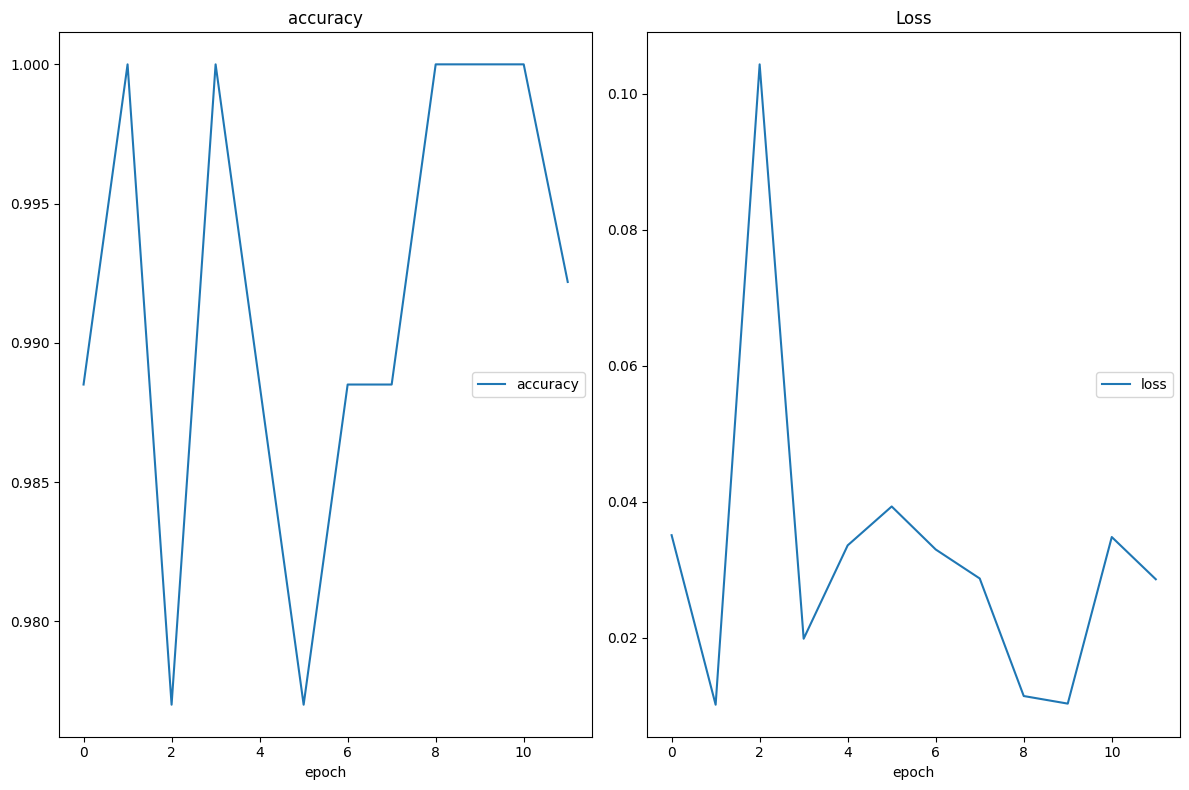

accuracy
	accuracy         	 (min:    0.977, max:    1.000, cur:    0.992)
Loss
	loss             	 (min:    0.010, max:    0.104, cur:    0.029)
2/2 [==============================] - 17s 9s/step - loss: 0.0286 - accuracy: 0.9922


In [25]:
models2 = [vgg19_model_dnn,xception_model_dnn, mobilenet_model_dnn]
model_input = Input(shape=(224, 224, 3))
model_outputs = [model(model_input) for model in models2]
ensemble_output = Average()(model_outputs)
ensemble_model = Model(inputs=model_input, outputs=ensemble_output, name='ensemble')
plot_loss_densenet = PlotLossesCallback()

optim_1 = Adam(learning_rate=0.001)

tl_checkpoint_ensemble2 = ModelCheckpoint(filepath='tl_model_processed_ensemble2.weights.best.hdf5',
                                      monitor='loss',
                                save_best_only=True,
                                save_weights_only=True,
                                verbose=1)

# EarlyStopping
early_stop = EarlyStopping(monitor='loss',
                        patience=10,
                        restore_best_weights=True,
                        mode='min')

ensemble_model.compile(optimizer=optim_1, 
            loss='categorical_crossentropy',
            metrics=['accuracy'])

ensemble_model.fit(traingen,
        batch_size=BATCH_SIZE,
        epochs= n_epochs,
        shuffle= True,
        steps_per_epoch=n_steps,
        callbacks=[tl_checkpoint_ensemble2, early_stop, plot_loss_densenet],
        verbose=1)

In [26]:
y_prob = ensemble_model.predict(testgen)
y_pred = y_prob.argmax(axis=-1)

1/1 [==============================] - 9s 9s/step


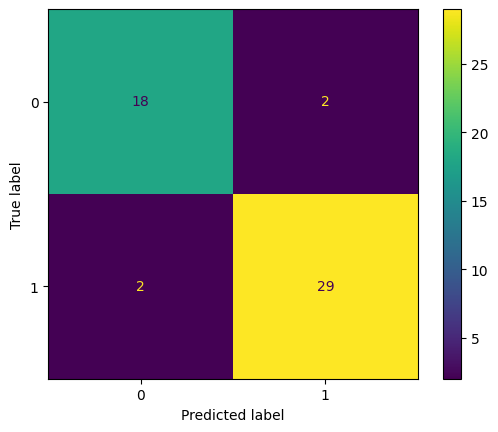

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(testgen.classes, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [28]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score, jaccard_score, roc_auc_score
y_test = testgen.classes
acc = accuracy_score(y_pred, y_test)
balanced_acc = balanced_accuracy_score(y_pred, y_test)
precision = precision_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)
auc = roc_auc_score(y_pred, y_test)
sensitivity = cm[0,0]/(cm[0,0] + cm[0,1])
specificity = cm[1,1] / (cm[1,0] + cm[1,1])

In [29]:
g_mean = math.sqrt(sensitivity * specificity)

In [30]:
data = {
    "accuracy" : acc,
    "balanced_acc": balanced_acc,
    "precision": precision,
    "recall": recall,
    "fmean": f1,
    "auc": auc,
    "sensitivity": sensitivity,
    "specificity": specificity,
    "g_mean": g_mean
}
print(data)

{'accuracy': 0.9215686274509803, 'balanced_acc': 0.917741935483871, 'precision': 0.9354838709677419, 'recall': 0.9354838709677419, 'fmean': 0.9354838709677419, 'auc': 0.917741935483871, 'sensitivity': 0.9, 'specificity': 0.9354838709677419, 'g_mean': 0.9175704244748561}
